# Homework 04 - Numpy

### Exercise 1 - Terminology

Describe the following terms with your own words:

***numpy array:*** is a grid of values, which all have the same type. It can have one or more dimension. Numpy object can be created using array() function. 

***broadcasting:*** refers to the way that numpy treats array with different dimension. It uses to be able to apply operations on arrays of different size (expand arrays to match)

Answer the following questions:

***What is the difference between a Python list and a Numpy array?***
Numpy array has elements with the same type but Python list can have elements with different type. Numpy array comsumes less space in memory and performs faster than Python list. Lists could not be arithmetically combined with numbers.

***How can you avoid using loops or list comprehensions when working with Numpy?***
Using np.arange() can avoid loops or list comprehensions. For example: 
import numpy as np
Size = 10000
* without numpy
list1 = range(Size)
list2 = range(Size)
result = [(x,y) for x,y in zip(list1,list2)]
* with numpy
A1 = np.arange(Size)
A2 = np.arange(Size)
result1 = A1+A2

***Give different examples of usages of square brackets `[]` in Python and Numpy? Describe at least two completely different ones!***
* 2D array in numpy needs another square bracket. For example: 
np_array=array([[1,2,3,4,5],[6,7,8,9,10]])
*but if we input only one square bracket, numpy treat it differently. For example:
np_array=array([1,2,3,4,5],[6,7,8,9,10])
*arbitrary_function([1, 2, 3, 4, 5], [6, 7, 8, 9, 10]) passes two lists as separate arguments to arbitrary_function (one argument is [1, 2, 3, 4, 5] and the second is [6, 7, 8, 9, 10]).


***Give different examples of usages of round brackets `()` in Python and Numpy? Describe at least two completely different ones! (Bonus: give a third example not covered in the lecture until now!)***
** In numpy, using round brackets in np.arrays(([x])) different shapes when using square brackets in np.arrays([[x]]). First one is one-dimensional, the second one is 2-dimensional. For example: 
y1 = np.array(([2, 9]), dtype=float)
y1.shape  # (2,)
y2 = np.array([[2, 9]], dtype=float)
y2.shape  # (1, 2)

* round brackets in Python show different type of data:
a = (3)
type(a)  # int
b = (3, )
type(b)  # tuple
c = (3, 4)
type(c)  # tuple

** Numpy treats tuple in round brackets the same as if we put a list in np.arrage for zero's initialization
a=np.zeros((3,3))     ## array([[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])
a=np.zeros([3,3])    ## array([[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])

*but if you initialize using the same pattern in simple python it will count them as tuple and list respectively.

a=([2,6],[4,5])
type(a) ## tuple

b=[[2,6],[4,5]]
type(b) ## list


### Exercise 2 - rotate and plot points in 2D

Plot the 5 points in 2D defined in the array `points`, then rotate the points by 90 degrees by performing a matrix multiplication with a [rotation matrix](https://en.wikipedia.org/wiki/Rotation_matrix) by using `rotation_matrix @ points` and plot the result in the same plot. The rotation angle needs to be converted to radians before it is passed to `np.cos()` and `np.sin()`, use `np.radians(90)` to do so.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

points = np.array([[0, 0],
                   [1, 1],
                   [-1, -1],
                   [0, 1],
                   [0, 0.7],
                  ]).T

print(points)

[[ 0.   1.  -1.   0.   0. ]
 [ 0.   1.  -1.   1.   0.7]]


In [2]:
radians = np.radians(90)
sinX = np.sin(radians)
cosX = np.cos(radians)
Rot = np.array(((cosX, -sinX), (sinX, cosX)))

points_rot = np.array([points[0]*cosX-points[1]*sinX, points[0]*sinX+points[1]*cosX])
print(points_rot)

[[ 0.0000000e+00 -1.0000000e+00  1.0000000e+00 -1.0000000e+00
  -7.0000000e-01]
 [ 0.0000000e+00  1.0000000e+00 -1.0000000e+00  6.1232340e-17
   4.2862638e-17]]


The result should like like this:

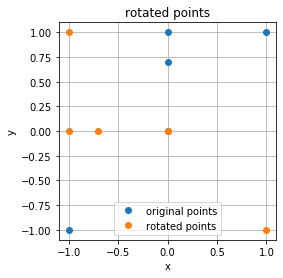

In [3]:
plt.plot(*points, 'o', label='original points')
plt.plot(*points_rot, 'o', label='rotated points')
plt.gca().set_aspect('equal')
plt.title('rotated points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid();

### Exercise 3 - Flatten the curve

Copy the function `new_infections(t, k)` from last week's homework (exercise 3) and re-do the exercise using Numpy arrays instead of Python lists.

What needs to be changed in the function `new_infections(t, k)` to make this work?

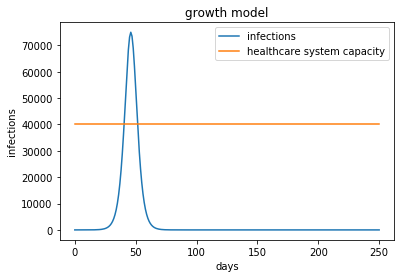

In [53]:
P=1000000
k=3/(P*10)
i_0=1
capacity=40000 #hospital places

t = np.arange(251)

def new_infections(t,k):
    new_infect = np.array(np.exp(-k*P*t)*k*P**2*(-1+P/i_0)/((1+np.exp(-k*P*t)*(-1+P/i_0))**2))
    return new_infect

newinfect = new_infections(t,k)

import matplotlib.pyplot as plt
plt.plot(newinfect,label = 'infections')
plt.plot([capacity]*len(t),label = 'healthcare system capacity')
plt.xlabel('days')
plt.ylabel('infections')
plt.title('growth model')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


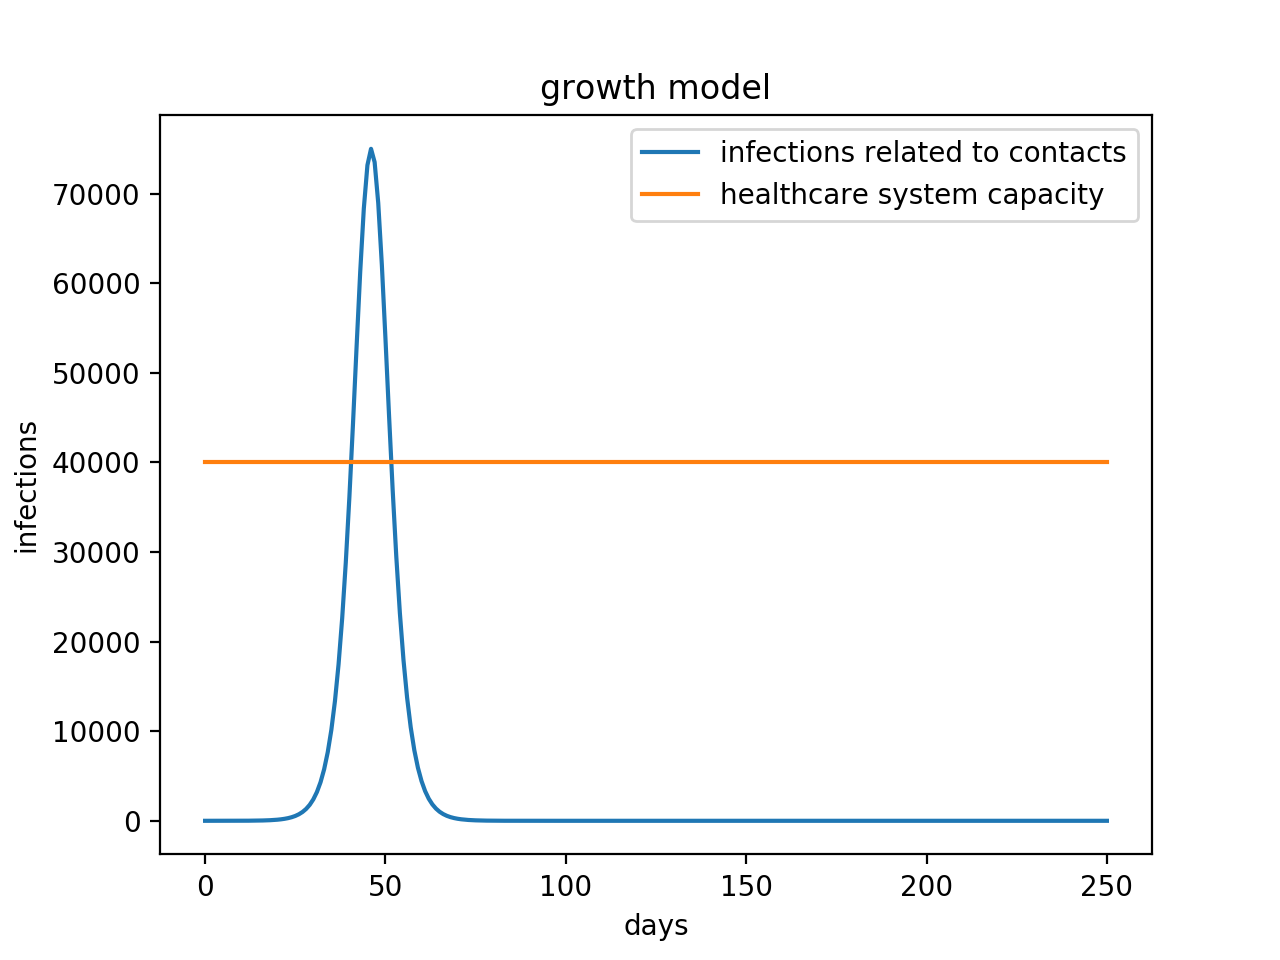

interactive(children=(FloatSlider(value=0.3, description='c', max=0.8999999999999999, min=-0.3), Output()), _d…

In [54]:
%matplotlib notebook
from ipywidgets import interact
line, = plt.plot(newinfect,label = 'infections related to contacts')
plt.plot([capacity]*len(t),label = 'healthcare system capacity')
plt.xlabel('days')
plt.ylabel('infections')
plt.title('growth model')
plt.legend()
def update(c=3.0/10.):
    line.set_ydata([new_infections(time, c / P) for time in t])

interact(update);

### Exercise 4 - Mean of random numbers

Generate 100 random values between 0 and 1 (uniformly distributed) and plot them. Then calculate the mean value of the first i values for $i=1,\ldots,100$ and plot this list too.

To solve the exercise find out how to generate random values with Numpy! How did you find an answer? Which possible ways are there? List at least ***2 to 5 different ways*** to look up what a numpy function does!

Note: To solve this exercise, a list comprehension is necessary. Pure Numpy is faster, but probably not a good idea here.

[0.12352185 0.01700765 0.98718673 0.30074982 0.05611097 0.14381575
 0.45425032 0.34491937 0.02903242 0.18953752 0.92949325 0.56217879
 0.1971211  0.48116313 0.66623425 0.40647503 0.03781562 0.85125528
 0.5377063  0.39162279 0.01363723 0.61990137 0.38454198 0.99003063
 0.35924439 0.66725239 0.03794485 0.94955465 0.61763543 0.91192752
 0.28243428 0.46038452 0.62014719 0.67796815 0.43036961 0.03199298
 0.81562404 0.13966365 0.58419911 0.80326912 0.46618549 0.53930006
 0.84319431 0.8465108  0.48734212 0.10423566 0.3435311  0.59737974
 0.17512531 0.84824483 0.9720014  0.93342051 0.26634529 0.56274858
 0.23978053 0.2269115  0.01880597 0.33063938 0.27025279 0.02793777
 0.22921987 0.06690896 0.99559717 0.72529497 0.88486322 0.97662102
 0.12287441 0.43530425 0.2126263  0.47018208 0.47178552 0.91545842
 0.4546515  0.52580216 0.98660706 0.45940682 0.38655524 0.06005664
 0.20863256 0.70708667 0.176058   0.86079252 0.08933019 0.96034894
 0.43764771 0.52688093 0.87801379 0.86398762 0.92697128 0.5469

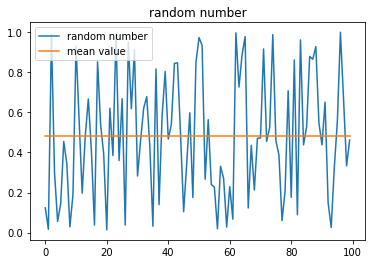

In [1]:
import numpy as np
import matplotlib.pyplot as plt

random = np.random.random_sample(100)
ran_mean = [np.mean(random)] * len(random)
print(random)

plt.plot(random, label = 'random number')
plt.plot(ran_mean, label = 'mean value')
plt.title('random number')
plt.legend()
plt.show()

[0.70622533 0.30328554 0.70324509 0.47614477 0.36026799 0.26655848
 0.50998076 0.99730236 0.17083239 0.05798258 0.21384895 0.26031986
 0.99159837 0.95531541 0.33129652 0.67299711 0.11769068 0.44513154
 0.4127222  0.85043253 0.41811528 0.02363572 0.5918379  0.04913831
 0.94498728 0.78984784 0.1019181  0.15456057 0.53966513 0.71859914
 0.7235392  0.05479632 0.42328928 0.00145547 0.63094723 0.06712692
 0.98797675 0.92116912 0.24843332 0.02111616 0.69662223 0.97749713
 0.02437296 0.24508601 0.47372453 0.90568673 0.19273432 0.96382143
 0.85637827 0.93703144 0.75308905 0.16823452 0.25799262 0.60977176
 0.68360295 0.56866611 0.21613599 0.81262925 0.96316653 0.02873248
 0.30276207 0.70947003 0.66205833 0.30852683 0.65956454 0.99607147
 0.1344762  0.74511595 0.54096597 0.44551005 0.07921729 0.66578914
 0.73948056 0.81381429 0.38995572 0.15773732 0.99498046 0.31071838
 0.1965731  0.90949274 0.54007762 0.87031647 0.64441483 0.93742106
 0.36380631 0.81549988 0.82271163 0.93070347 0.93461836 0.4884

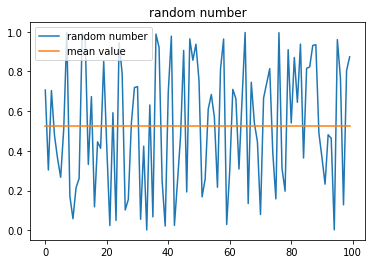

In [5]:
random1 = np.random.rand(100)
ran_mean1 = [np.mean(random1) for i in random1]
print(random1)

plt.plot(random1, label = 'random number')
plt.plot(ran_mean1, label = 'mean value')
plt.title('random number')
plt.legend()
plt.show()

[7.80270395e-01 7.91651134e-01 9.61962695e-01 1.70446938e-01
 1.23777761e-01 9.67754200e-03 6.90301736e-01 5.12911309e-01
 7.87483512e-01 4.63265074e-01 3.79462146e-01 6.08719289e-01
 4.76614260e-01 5.37507204e-01 5.14649719e-01 6.86847384e-01
 1.95932130e-01 1.59959656e-01 5.75687910e-01 6.13047441e-01
 6.51772981e-01 5.69408070e-01 6.93629617e-02 1.95516098e-01
 8.82820740e-01 5.90464353e-03 7.11882380e-01 1.22972202e-02
 4.01497150e-01 9.18621128e-01 7.54284669e-01 1.10901404e-01
 8.38483502e-01 3.68554584e-02 7.67092438e-01 8.03607490e-01
 1.75599487e-01 7.28477408e-01 1.71615787e-02 8.77586306e-01
 6.90605862e-01 7.64367805e-01 8.66057854e-01 7.50245777e-01
 5.97600390e-01 3.77402700e-01 8.01607535e-01 8.25975741e-02
 2.41390197e-01 1.18095854e-01 8.20509296e-02 8.48763993e-01
 9.27616918e-01 4.81483154e-01 6.15390536e-01 5.28246964e-01
 5.54102411e-01 7.88707859e-01 4.97899396e-01 1.13193907e-01
 9.68348096e-01 2.38672094e-01 8.10816418e-01 2.48604054e-02
 7.30644736e-01 3.327038

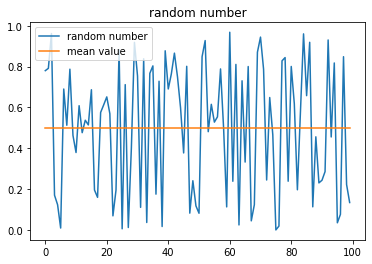

In [6]:
random2 = np.random.uniform(size=100)
ran_mean2 = [np.mean(random2) for i in random2]
print(random2)

plt.plot(random2, label = 'random number')
plt.plot(ran_mean2, label = 'mean value')
plt.title('random number')
plt.legend()
plt.show()

We got the answers from this website: https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html

#### Additional try

In [20]:
randomx = np.random.random_sample(100)
meanvalue = []
for i in range(1,101):
    mean = sum(randomx[0:i])/i
    meanvalue.append(mean)

<function matplotlib.pyplot.show(*args, **kw)>

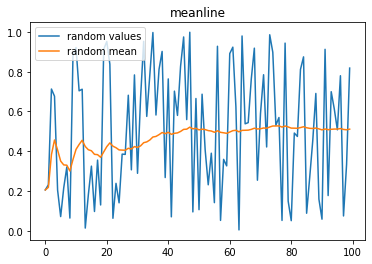

In [21]:
plt.plot(randomx,label = 'random values')
plt.plot(meanvalue,label = 'random mean')
plt.title('meanline')
plt.legend()  
plt.show